# Proyecto Automotriz - ID4IDEAS

In [109]:
#importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

#Display 6 registros
pd.options.display.min_rows = 6

In [110]:
#importamos los df
df_empleados = pd.read_csv(r"C:\Users\miche\OneDrive\Escritorio\Proyectos\Proyecto_IDforIdeas\idea6(1)\Empleados.csv", sep=";")
df_ventas = pd.read_csv(r"C:\Users\miche\OneDrive\Escritorio\Proyectos\Proyecto_IDforIdeas\idea6(1)\Ventas.csv", sep=";", parse_dates=["Fecha"], na_values=0, thousands=",")

C:\Users\miche\AppData\Local\Temp\ipykernel_1080\3506267144.py:3: DtypeWarning: Columns (0,1,4,5,7,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ventas = pd.read_csv(r"C:\Users\miche\OneDrive\Escritorio\Proyectos\Proyecto_IDforIdeas\idea6(1)\Ventas.csv", sep=";", parse_dates=["Fecha"], na_values=0, thousands=",")


In [111]:
#Verificamos los DF
df_ventas.head(2)

,IdCliente,NombreCliente,Fecha,Empleado,Referencia,Descripcion,CodigoFamilia,Familia,Cantidad,Ventas,Localidad,Sede,Area
0,C1070956433,PINTO JOHN,1/9/2016,24.0,LL-2R-0038,PILOT STREET 110/80-17,101.0,LLANTA,1.0,129310,Puente aranda,Calle 13,35.0
1,C1032372566,CESAR CRUZ,1/9/2016,14.0,LL-TCA-0133,TOURING 175/70R13,101.0,LLANTA,2.0,181034,Suba,Suba,32.0


In [112]:
#Verificamos los DF
df_empleados.head(2)

,Id_Empleado,Nombre y Apellido
0,1,Juan Pastran
1,2,Esteban Damico


In [113]:
#Cambiamos de RangeIndex a Index
nuevo_index = np.arange(0, len(df_ventas), 1)
df_ventas["nuevo_indice"] = nuevo_index
df_ventas.set_index("nuevo_indice", inplace=True)

In [114]:
#Reseteamos el index para volverlo un Index regular
df_ventas.reset_index(drop=True)

,IdCliente,NombreCliente,Fecha,Empleado,Referencia,Descripcion,CodigoFamilia,Familia,Cantidad,Ventas,Localidad,Sede,Area
0,C1070956433,PINTO JOHN,1/9/2016,24.0,LL-2R-0038,PILOT STREET 110/80-17,101.0,LLANTA,1.0,129310,Puente aranda,Calle 13,35.0
1,C1032372566,CESAR CRUZ,1/9/2016,14.0,LL-TCA-0133,TOURING 175/70R13,101.0,LLANTA,2.0,181034,Suba,Suba,32.0
2,C2865810,PINEDA JAIME,1/9/2016,12.0,LL-TCA-0019,ENERGY XM2 185/65R14,101.0,LLANTA,1.0,193095,Usaquen,Santa ana,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
#transformamos la fecha
df_ventas["Fecha"] = df_ventas["Fecha"].str.replace("/", "-")
df_ventas["Fecha"] = pd.to_datetime(df_ventas["Fecha"], dayfirst=True)

In [116]:
#Borramos las columnas que tengan un minimo de 5 Nan
df_ventas.dropna(axis=0, thresh=5, inplace=True)

In [117]:
df_ventas["Empleado"] = df_ventas["Empleado"].astype("str")

In [118]:
#Verificamos el tipo de dato
df_ventas["Empleado"].fillna(0)
df_ventas["Cantidad"].fillna(0)

#Transformamos el tipo de dato
df_ventas["Empleado"] = df_ventas["Empleado"].replace("nan", 0)

In [119]:
df_ventas["Empleado"] = df_ventas["Empleado"].astype("float")
df_ventas["Cantidad"] = df_ventas["Cantidad"].astype("float")
df_ventas["Empleado"] = df_ventas["Empleado"].astype("int")
df_ventas["Area"] = df_ventas["Area"].astype("int")

In [120]:
#Extraemos Fechas por separados
df_ventas["anio"] = df_ventas["Fecha"].dt.year
df_ventas["mes"] = df_ventas["Fecha"].dt.month_name()
df_ventas["dia"] = df_ventas["Fecha"].dt.day_name()

#Cambiamos
df_ventas.rename(columns={"Empleado": "IdEmpleado"}, inplace=True)
df_empleados.rename(columns={"Id_Empleado": "IdEmpleado"}, inplace=True)

In [121]:
#Combinamos los datasets
df = pd.merge(df_ventas, df_empleados, how="left",on="IdEmpleado")

In [122]:
df.shape

(127255, 17)

In [123]:
#Cambiamos el formato de Ventas
df["Ventas"] = df["Ventas"].str.replace(".", "").str.replace(",", "")
df["Ventas"] = df["Ventas"].astype("float")

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127255 entries, 0 to 127254
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   IdCliente          127255 non-null  object        
 1   NombreCliente      127255 non-null  object        
 2   Fecha              127255 non-null  datetime64[ns]
 3   IdEmpleado         127255 non-null  int32         
 4   Referencia         127255 non-null  object        
 5   Descripcion        127255 non-null  object        
 6   CodigoFamilia      127255 non-null  float64       
 7   Familia            127255 non-null  object        
 8   Cantidad           127255 non-null  float64       
 9   Ventas             127255 non-null  float64       
 10  Localidad          127255 non-null  object        
 11  Sede               127255 non-null  object        
 12  Area               127255 non-null  int32         
 13  anio               127255 non-null  int32   

In [125]:
#Transformamos las ventas
df["Ventas_USD"] = df["Ventas"]* 0.00023

In [126]:
#Cambiamos de RangeIndex a Index
nuevo_index = np.arange(0, len(df_ventas), 1)
df["nuevo_indice"] = nuevo_index
df.set_index("nuevo_indice", inplace=True)

In [127]:
#Indicadores Basicos
#Venta Total
venta_total = print(f'Las ventas totales desde el año {df.anio.min()} al año {df.anio.max()} son de ${df["Ventas_USD"].sum()}')
#Ventas total por año
ventas_anios = df.groupby(["anio", "mes", "IdEmpleado"])[["Ventas_USD"]].sum().reset_index()

Las ventas totales desde el año 2016 al año 2020 son de $25178376.523940004


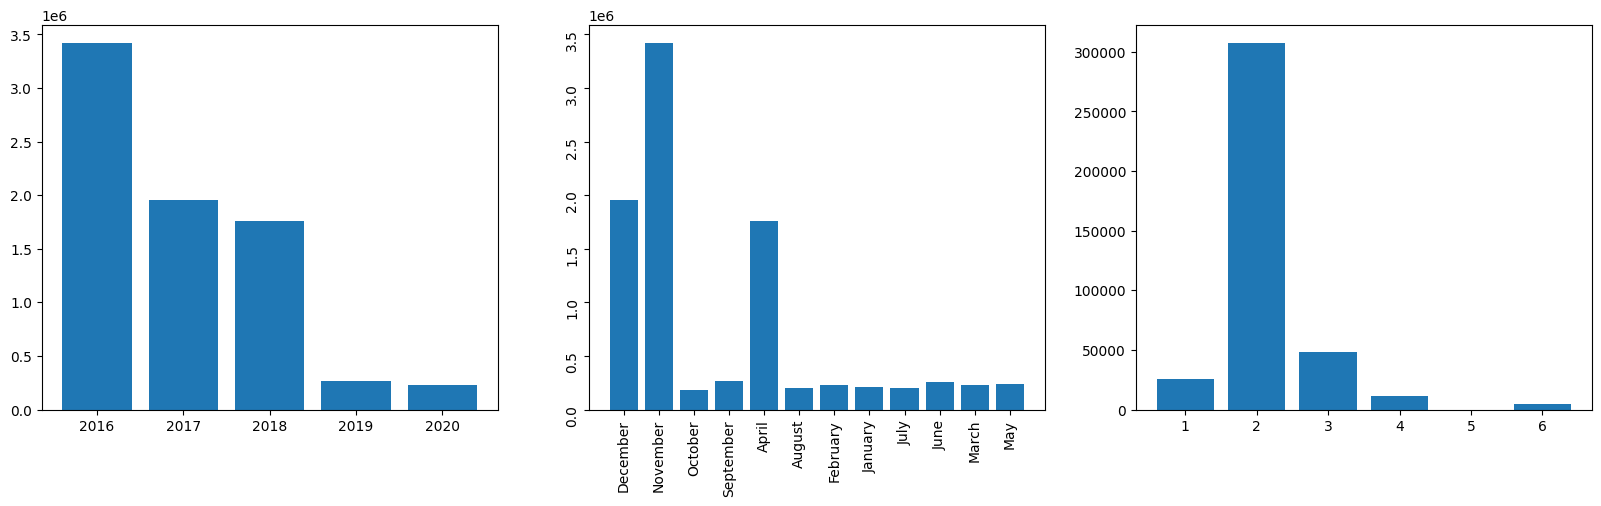

In [128]:
#Graficos Exploratorios
f, ax = plt.subplots(figsize=(20,5), ncols=3, nrows=1)
ax[0].bar(x=ventas_anios["anio"], height=ventas_anios["Ventas_USD"])
ax[1].bar(x=ventas_anios["mes"], height=ventas_anios["Ventas_USD"])
ax[2].bar(x=ventas_anios["IdEmpleado"][0:5], height=ventas_anios["Ventas_USD"][0:5])
ax[1].tick_params(rotation=90)

In [129]:
#Cantidad de Elementos Vendidos
df["Cantidad"].sum()

317139.0

In [130]:
#Ganancia Facturación Total de Servicios
round(df[df["Familia"] == "SERVICIOS"]["Ventas_USD"].sum(),2)

2591311.1

In [131]:
#Cantidad de Servicios Ofrecidos
df[df["Familia"] == "SERVICIOS"]["Familia"].count()

88230

In [132]:
#Cantidad de Sedes o ubicaciones disponibles
df["Sede"].nunique()

7

In [133]:
# Ventas totales por Sedes en cada Rubro o Familia y Servicios
df.groupby(["Sede", "Familia"])[["Ventas_USD"]].sum().reset_index().sort_values(by=("Ventas_USD"),ascending=False).style.bar()

,Sede,Familia,Ventas_USD
29,Ventas externas,LLANTA,16697674.166360
18,Grandes flotas,SERVICIOS,1889883.492040
31,Ventas externas,REENCAUCHE,1386986.154780
11,Calle 80,LLANTA,1205319.533760
16,Grandes flotas,LLANTA,781157.662720
1,Av Chile,LLANTA,704885.206470
6,Calle 13,LLANTA,522452.449700
20,Santa ana,LLANTA,513798.755130
32,Ventas externas,SERVICIOS,276223.211320
25,Suba,LLANTA,252698.455740


In [137]:
#Cantidad de Ventas realizadas por sus empleados
df.groupby(["IdEmpleado", "Nombre y Apellido"], as_index=False)[["Ventas_USD"]].agg(["sum", "count"]).sort_values(by=("Ventas_USD", "count"), ascending=False).style.bar()

In [135]:
#Redondeamos
df["Ventas_USD"] = round(df["Ventas_USD"],2)

In [136]:
#Exportamos
df.to_csv("df_automotriz_nuevo.csv", index=False)